In [2]:

### BIBLIOTEKI ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



file_path1 = "results_Szczecin_v3.xlsx"
sheets_dict = pd.read_excel(file_path1, sheet_name=None)

rates = {} # Pusty słownik do zappisywania 
for sheet_name, dataframe in sheets_dict.items():
    rates[sheet_name] = dataframe


# Skumulowane stopy zwrotu 

In [3]:
g1 = rates['results_50_5_l']
cumulative_return = (1 + pd.Series(g1['Mean'])).prod() - 1

print(f"Skumulowana stopa zwrotu: {cumulative_return * 100:.2f}%")

Skumulowana stopa zwrotu: 6936880424425180.00%


In [4]:
#stałe dla wielkości wykresów
FIGSIZE = (6,6)

TITLE_SIZE = 15
TITLE_COLOR = 'black'

LABEL_FONT_SIZE = 15
LABEL_FONT_COLOR = 'black'

LEGEND_SIZE = 9
LEGEND_LOCATION = 'upper right'

TICKS_FONT_SIZE = 12
TICKS_FONT_COLOR = 'dimgray'
TICKS_FONT_TILT = 45

ON_CHART_SIZE = 12
ON_CHART_COLOR = 'white'

OVER_BAR_SIZE = 10
OVER_BAR_COLOR = 'black'

ANNOTATIONS_FONT_SIZE = 10
ANNOTATIONS_FONT_COLOR = 'dimgray'

GRID_LINESTYLE = '--'
GRID_LINEWIDTH = 0.7
GRID_COLOR = 'lightgray'

LINEWIDTH = 0.1

TABLE_FONT = 14
TABLE_ROWS = 1.2
TABLE_COLS = 1.8

In [5]:

w1 = rates["results_10_1_s"]
w2 = rates["results_20_1_s"]
w3 = rates["results_50_1_s"] 
w4 =rates ["results_10_1_l"]
w5 = rates["results_20_1_l"]
w6 = rates["results_50_1_l"] 
w7 = rates["results_10_3_s"]
w8 = rates["results_20_3_s"]
w9 =rates ["results_50_3_s"] 
w10= rates["results_10_3_l"]
w11 =rates["results_20_3_l"]
w12 = rates["results_50_3_l"]
w13 = rates[ "results_10_5_s"]
w14 = rates[ "results_20_5_s"]
w15 = rates ["results_50_5_s"]
w16 = rates["results_10_5_l"]
w17 = rates["results_20_5_l"]
w18 = rates["results_50_5_l"]
w19 = rates["results_10_10_s"] 
w20 = rates [ "results_20_10_s"]
w21 = rates["results_50_10_s"]
w22 = rates[ "results_10_10_l"]
w23 = rates["results_20_10_l"]
w24 = rates[ "results_50_10_l"]


rates_list = [w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20,w21,w22,w23,w24]
def skumulowana(df):
    lista = []
    for i in range(len(df)) :
        lista.append(((1 + pd.Series(df.loc[0:i, 'Mean'])).prod() - 1) * 100)

    df['Skumulowana'] = lista 
   

for df in rates_list:
    skumulowana(df)



# Wyniki 

In [6]:
from matplotlib.ticker import FuncFormatter

def per_formatter(x, pos) :
    return f'{x:.3f} %'

formatter_per = FuncFormatter(per_formatter)

from matplotlib.ticker import ScalarFormatter



def wykres_1 (df, kolor, tytul):

    plt.figure(figsize=FIGSIZE)

    plt.plot(df['Date'],df['Skumulowana'], color= kolor , marker='o', linewidth=0.000000000000000000000000000000000000003)


    # Dodawanie tytułu i etykiet
    plt.title(tytul, fontsize = TITLE_SIZE, color = TITLE_COLOR)
    plt.xlabel('Rok', fontsize=LABEL_FONT_SIZE, color=LABEL_FONT_COLOR)
    plt.ylabel('Skumulowana stopa zwrotu', fontsize=LABEL_FONT_SIZE, color=LABEL_FONT_COLOR)

    # Ustawienia osi i siatki
    plt.xticks(rotation=TICKS_FONT_TILT, fontsize=TICKS_FONT_SIZE, color=TICKS_FONT_COLOR)
    plt.yticks(fontsize=TICKS_FONT_SIZE, color=TICKS_FONT_COLOR)
    plt.grid(True, linestyle=GRID_LINESTYLE, linewidth=GRID_LINEWIDTH, color=GRID_COLOR)

    plt.fill_between(df['Date'],df['Skumulowana'], color= kolor, alpha=0.4)

    plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    # Wyświetlanie wykresu
    plt.tight_layout()
    plt.show()

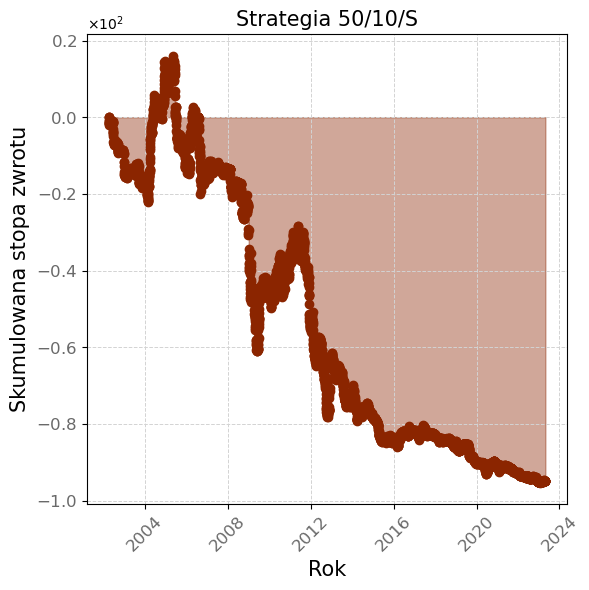

In [7]:
wykres_1(w21, "#8B2500",'Strategia 50/10/S')

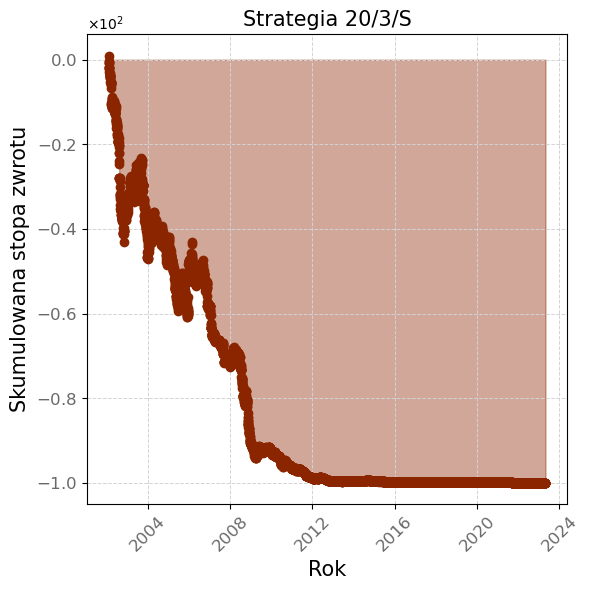

In [8]:
wykres_1(w8,"#8B2500", 'Strategia 20/3/S')

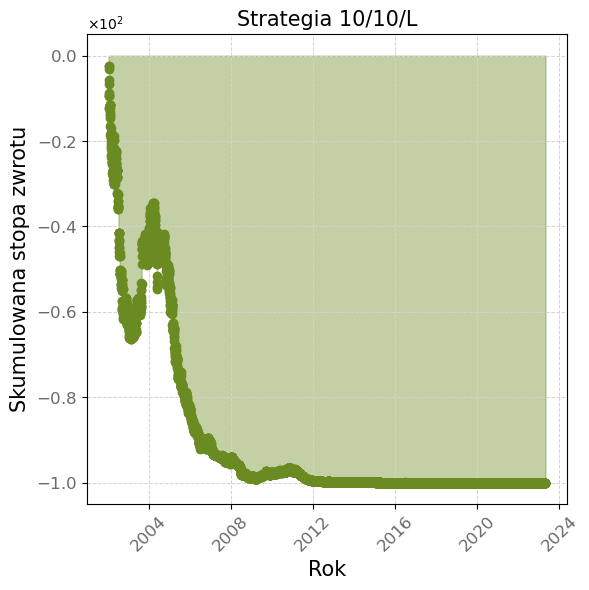

In [9]:
wykres_1(w1,"#698B22", "Strategia 10/10/L")

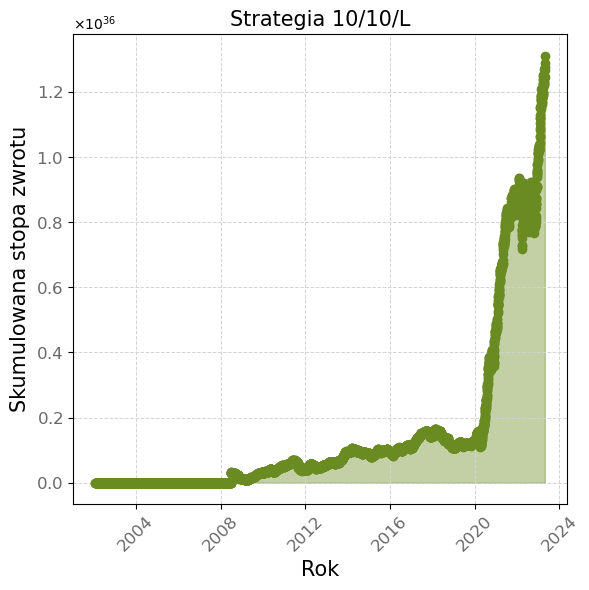

In [10]:
wykres_1(w22,"#698B22", "Strategia 10/10/L" )

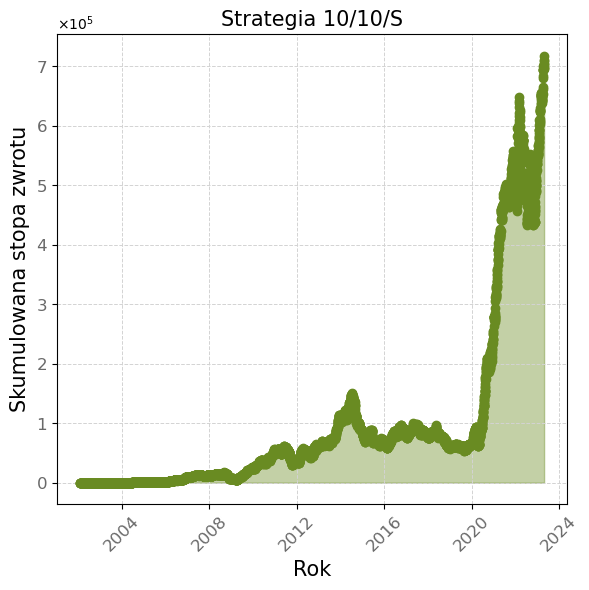

In [11]:
wykres_1(w19,"#698B22" , "Strategia 10/10/S")

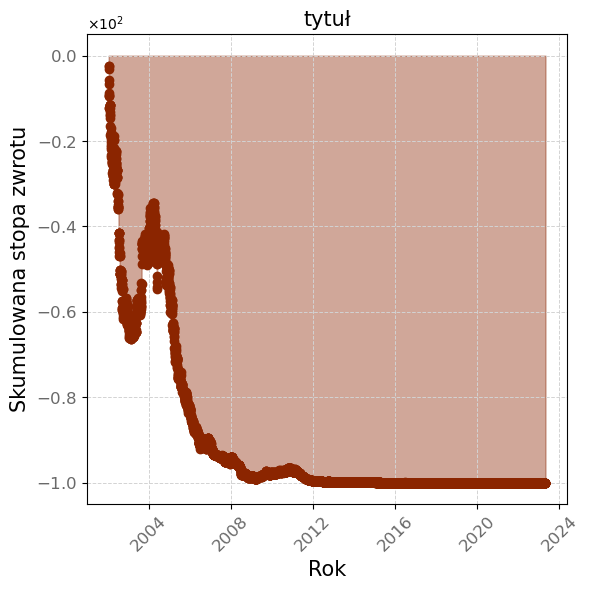

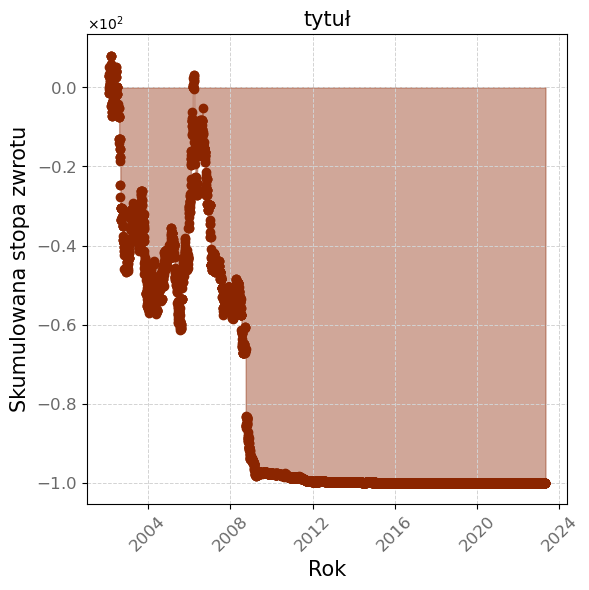

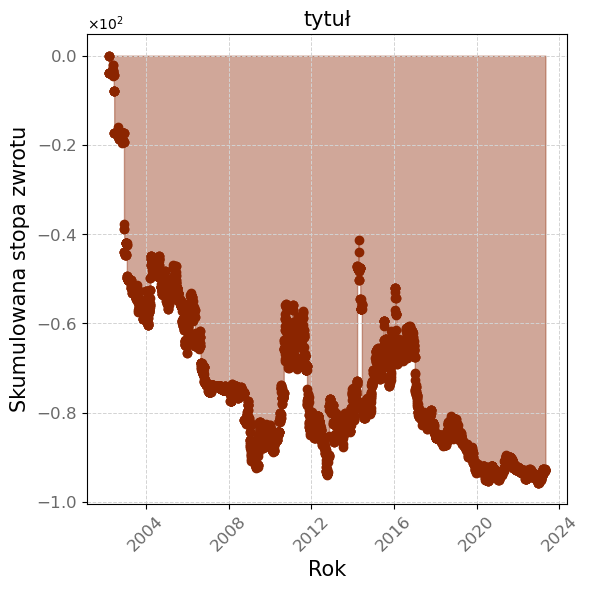

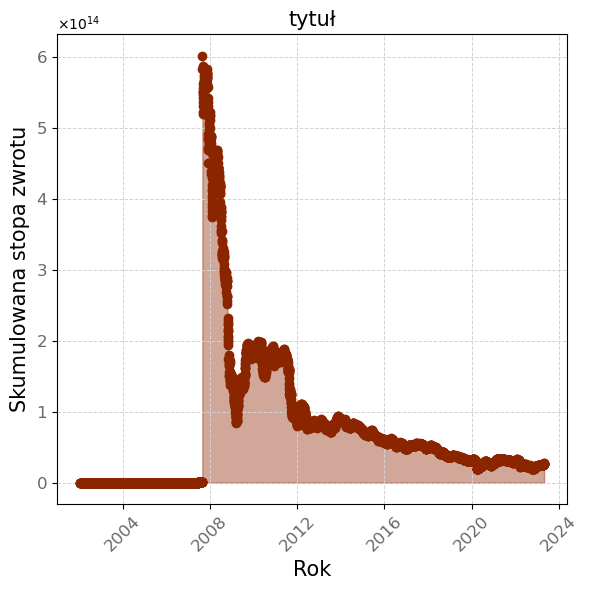

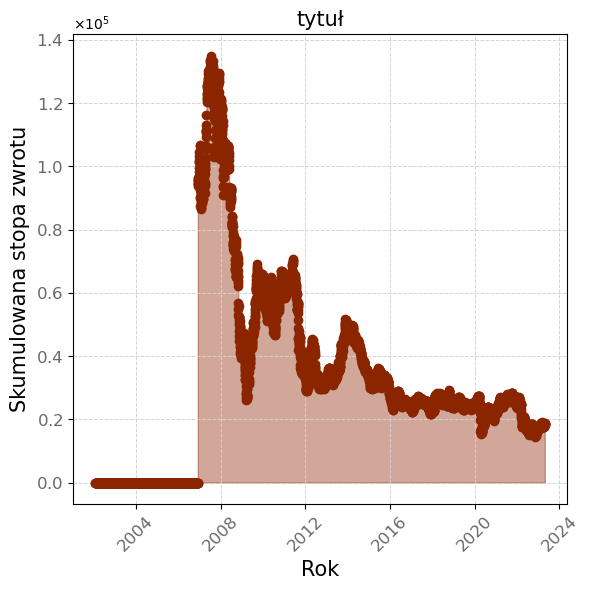

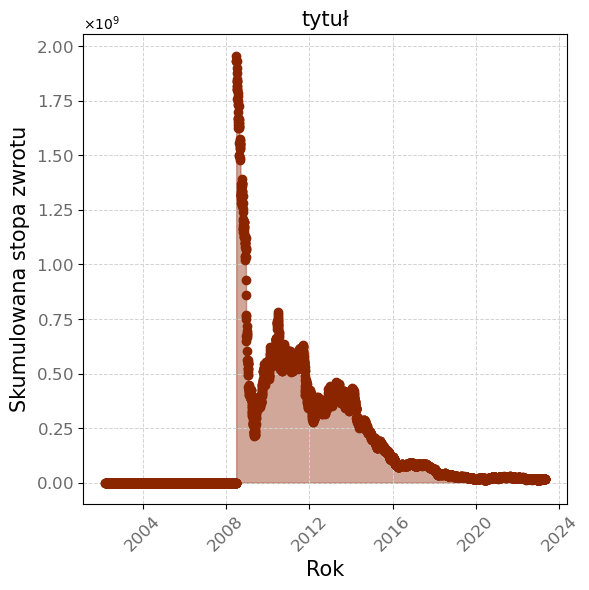

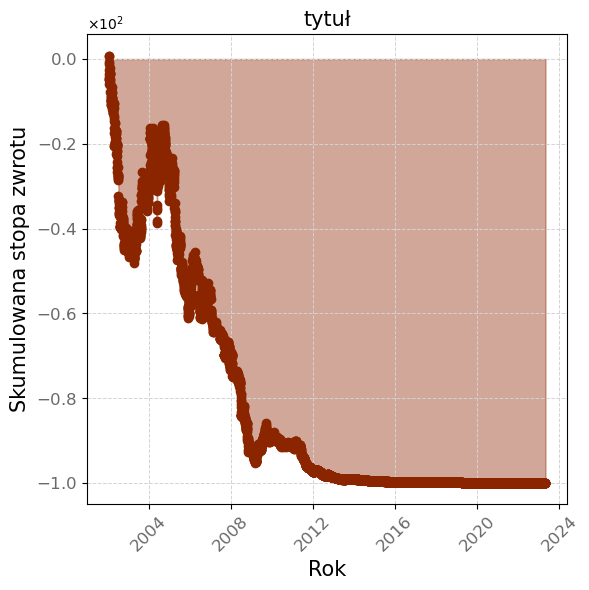

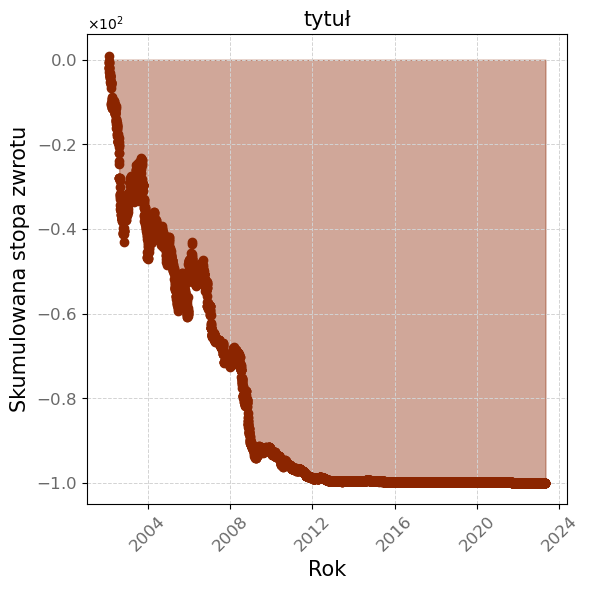

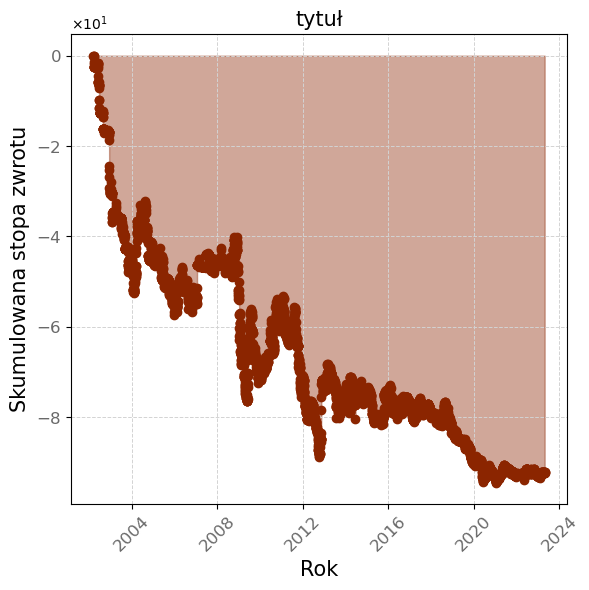

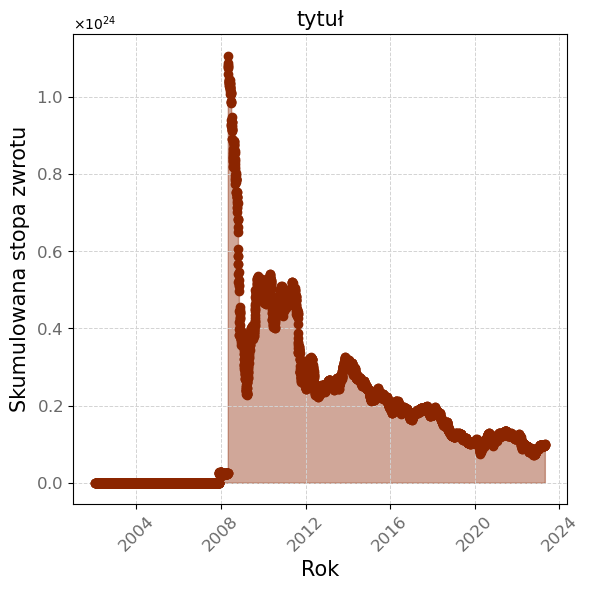

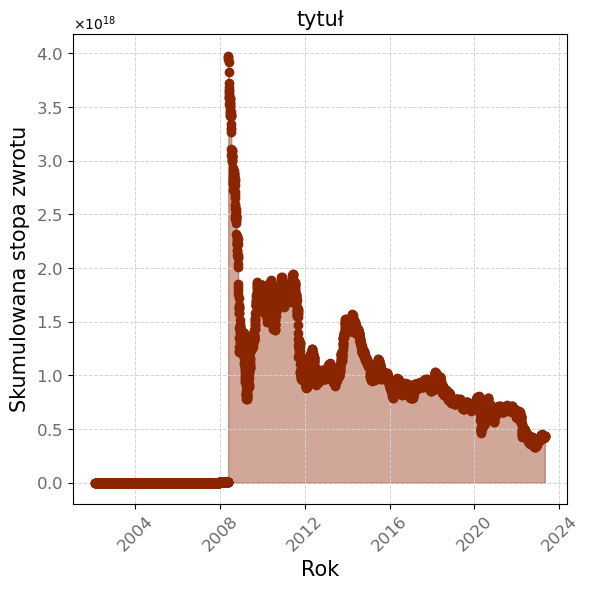

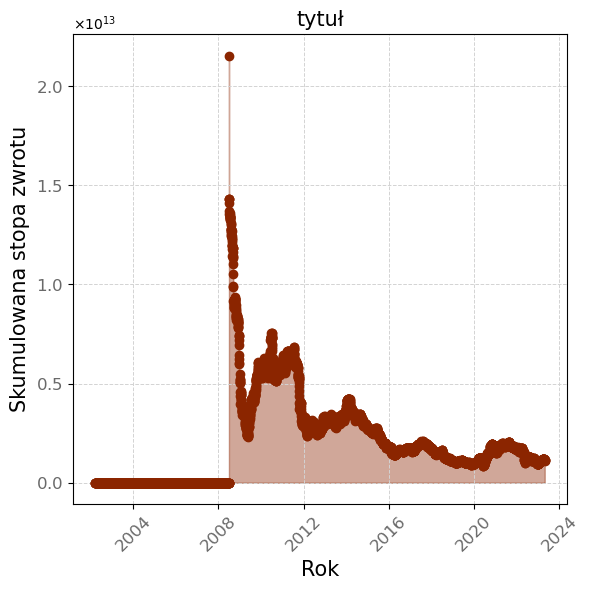

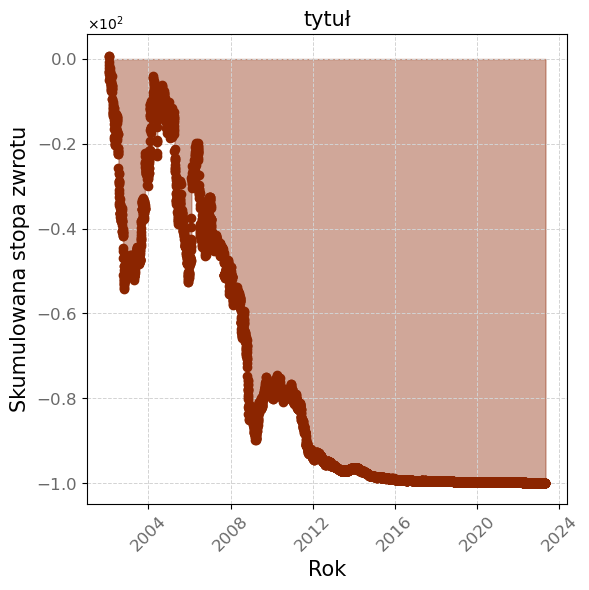

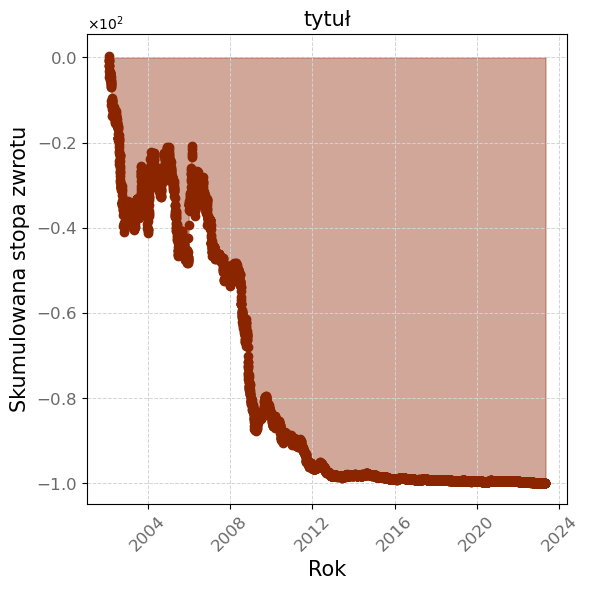

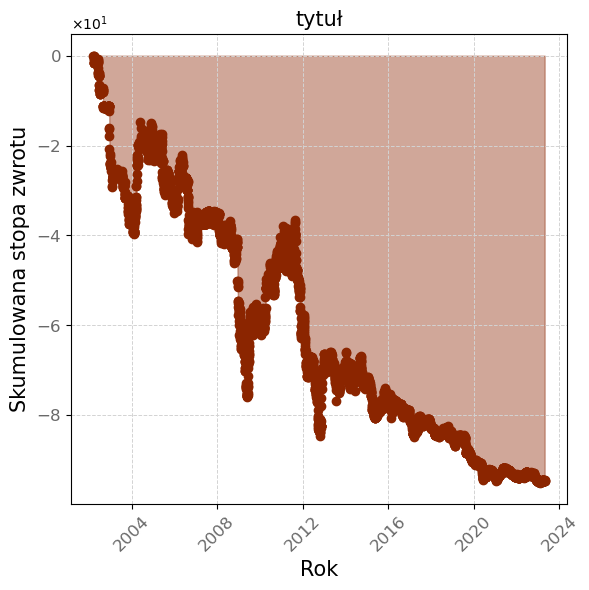

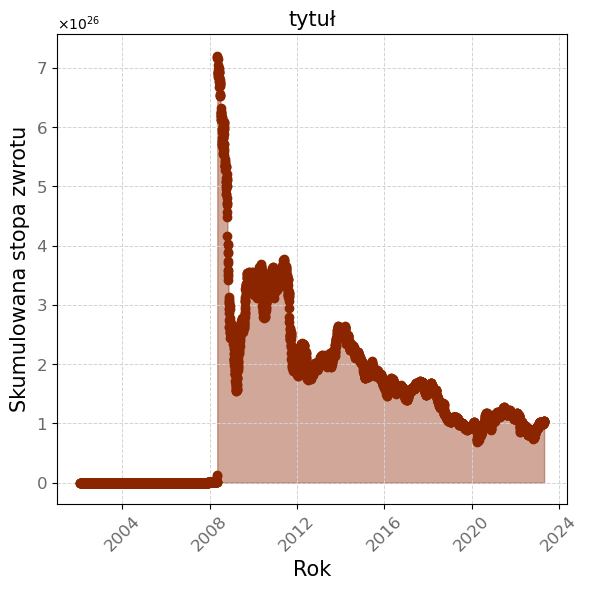

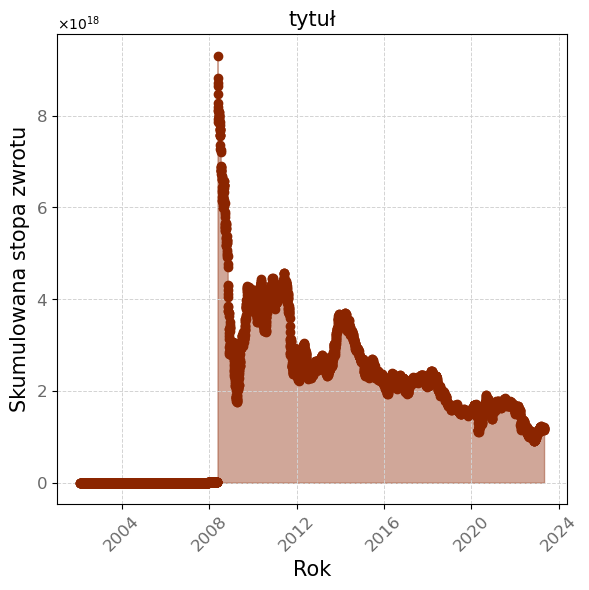

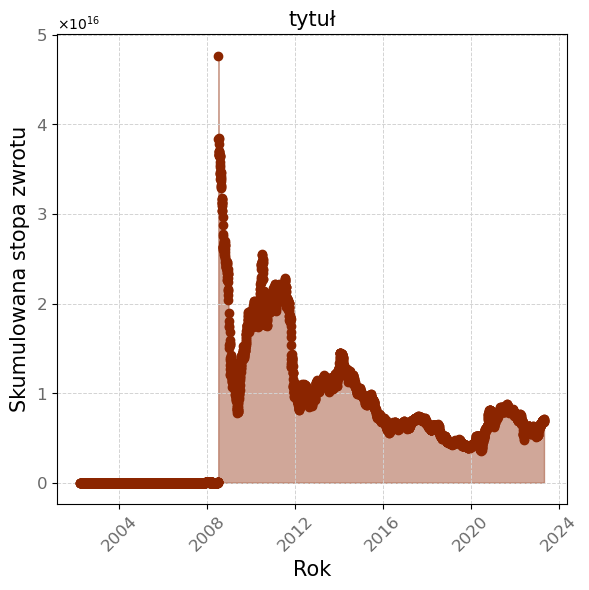

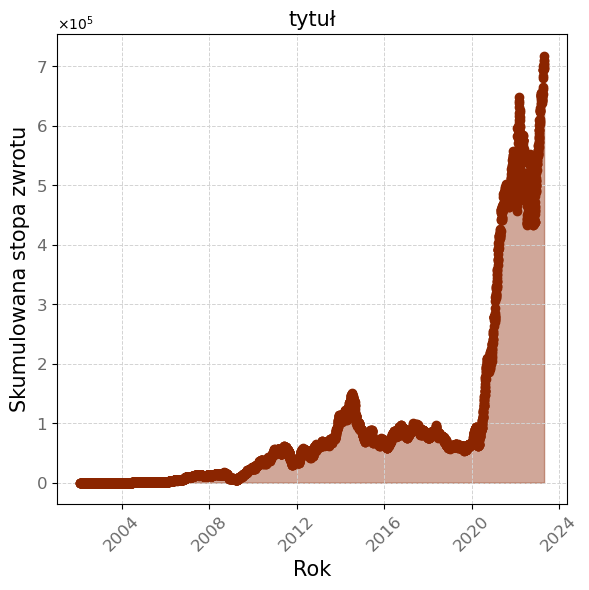

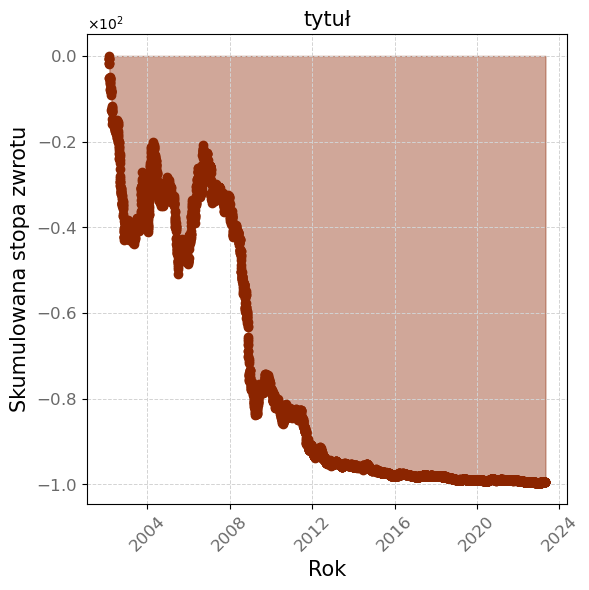

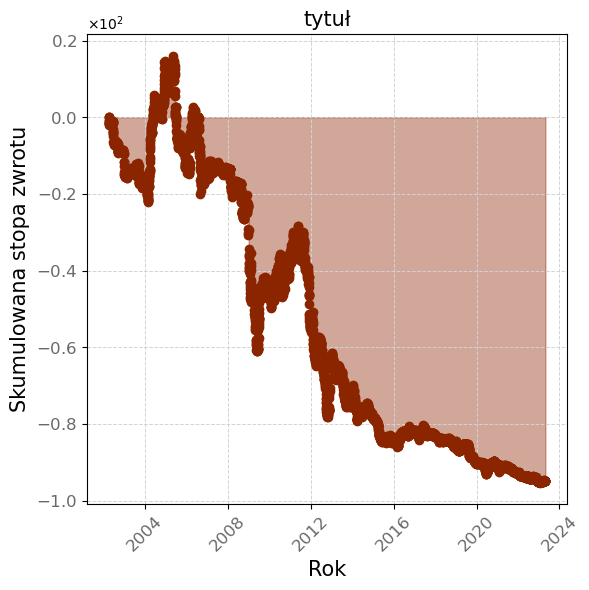

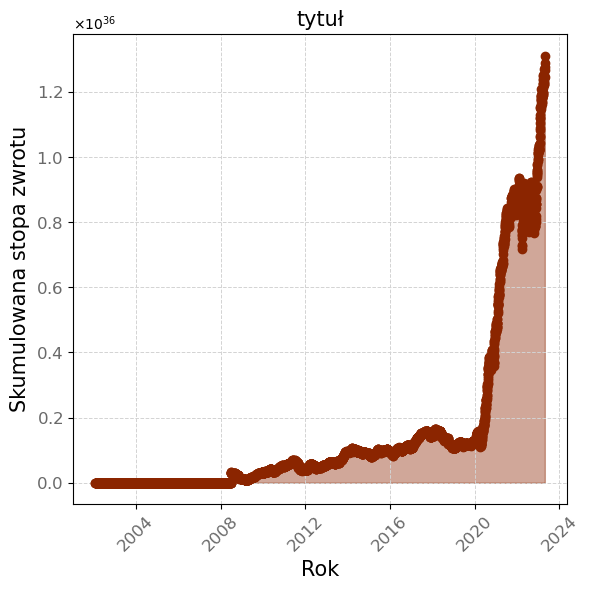

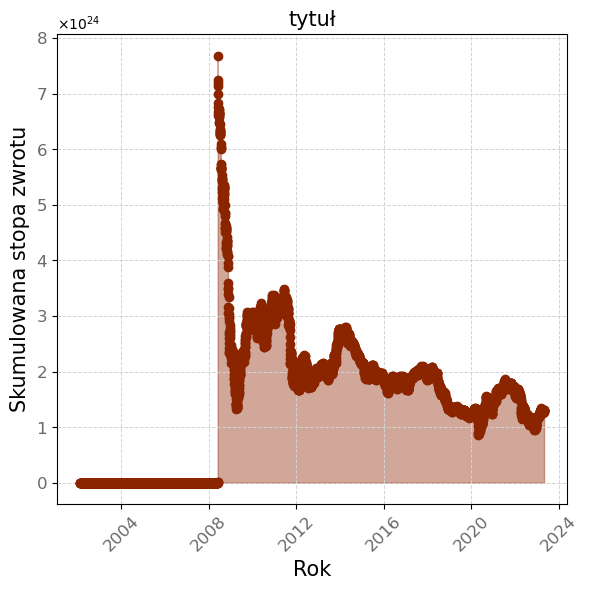

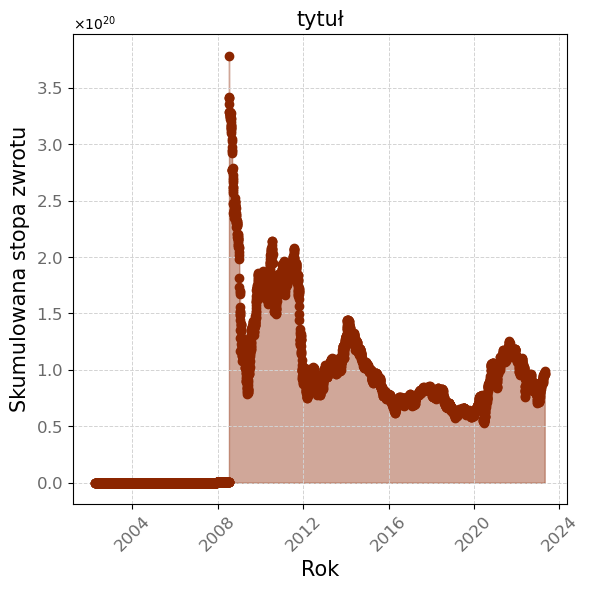

In [12]:
for df in rates_list:
    wykres_1(df, "#8B2500", "tytuł")
    

# Wielkość spółki a strategiia


In [13]:
df_small = [w1,w2,w3,w7,w8,w9,w13,w14,w15, w19,w20,w21]
df_big = [w4,w5,w6,w10,w11,w12,w16,w17,w18,w22,w23,w24]
for df in rates_list:
    df["Year"] = pd.to_datetime(df['Date']).dt.year

In [14]:
W = {
    "Year" : w1['Year'],
    "no1" : w2['Mean'],
    "no2" : w3['Mean'],
    "no3" : w7['Mean'],
    "no4" : w8['Mean'],
    "no5" : w9['Mean'],
    "no6" : w13['Mean'],
    "no7" : w14['Mean'],
    "no8" : w15['Mean'],
    "no9" : w19['Mean'],
    "no10" : w20['Mean'],
    "no11" : w21['Mean'],
    "no12" : w1['Mean']
}

WD = {
    "Year" : w4['Year'],
    "no1" : w4['Mean'],
    "no2" : w5['Mean'],
    "no3" : w6['Mean'],
    "no4" : w10['Mean'],
    "no5" : w11['Mean'],
    "no6" : w12['Mean'],
    "no7" : w16['Mean'],
    "no8" : w17['Mean'],
    "no9" : w18['Mean'],
    "no10" : w22['Mean'],
    "no11" : w23['Mean'],
    "no12" : w24['Mean']
}

dfs = pd.DataFrame(W)
dfb = pd.DataFrame(WD)

dfs['Mean'] = dfs.iloc[:,1:].mean(axis=1)

dfb['Mean'] = dfb.iloc[:,1:].mean(axis=1)



In [15]:
file_name = "Anova_data.xlsx"

dfd = {
    'Małe': dfs,
    'Duże' :dfb
}
# Zapisujemy dane do Excela
with pd.ExcelWriter(file_name) as writer:
    for sheet_name, df in dfd.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Wyniki zostały zapisane w pliku {file_name}")

Wyniki zostały zapisane w pliku Anova_data.xlsx


In [16]:
grpupeds = dfs.groupby('Year').mean().reset_index()
grpupeds_2 = grpupeds.iloc[:, 1:]
meanss = grpupeds_2.mean(axis = 1)

grpuped = dfb.groupby('Year').mean().reset_index()
grpuped_2 = grpuped.iloc[:, 1:]
meansd = grpuped_2.mean(axis = 1)

WS  ={
    "Year" : grpupeds['Year'],
    "Małe spółki" : meanss,
    "Duże spółki" : meansd

}

wykres = pd.DataFrame(WS)

grpupeds

,Year,no1,no2,no3,no4,no5,no6,no7,no8,no9,no10,no11,no12,Mean
0,2002,-0.002289,-0.002721,-0.002279,-0.001567,-0.001774,-0.002647,-0.001896,-0.001301,-0.002754,-0.002157,-0.000639,-0.003634,-0.002138
1,2003,-0.000697,-0.000498,0.001002,-0.000559,-0.000889,0.001591,0.000281,-0.000472,0.004940,0.000407,-0.000079,0.001782,0.000567
2,2004,0.001208,0.000519,0.000063,-0.000134,0.000395,0.000511,0.000604,0.000941,0.005048,0.000310,0.001211,-0.000787,0.000824
3,2005,0.001185,-0.000094,-0.001794,-0.000259,-0.000389,-0.001765,-0.000480,-0.000410,0.003309,-0.000654,-0.000665,-0.003595,-0.000468
4,2006,-0.000280,-0.001941,0.000333,-0.000736,0.000420,0.001095,-0.000305,-0.000436,0.008358,0.000970,-0.000303,-0.002114,0.000422
5,2007,-0.001342,-0.000322,-0.001404,-0.001363,0.000141,-0.001055,-0.000815,-0.000191,0.001337,-0.000590,-0.000241,-0.001615,-0.000622
6,2008,-0.006508,-0.003158,-0.005098,-0.004292,-0.001625,-0.004161,-0.003444,-0.001754,-0.002175,-0.003642,-0.001602,-0.005422,-0.003573
7,2009,-0.003043,0.002130,0.001886,-0.000499,-0.000098,0.001405,-0.000789,0.000613,0.005287,-0.000278,0.000292,0.003253,0.000847
8,2010,-0.001497,0.005611,-0.000490,-0.002251,0.001451,0.000303,-0.000897,0.001587,0.003325,-0.000438,0.001078,0.001319,0.000758
9,2011,-0.005128,-0.003190,-0.004578,-0.004910,-0.002360,-0.004861,-0.004112,-0.002129,-0.001574,-0.003658,-0.002303,-0.006872,-0.003806


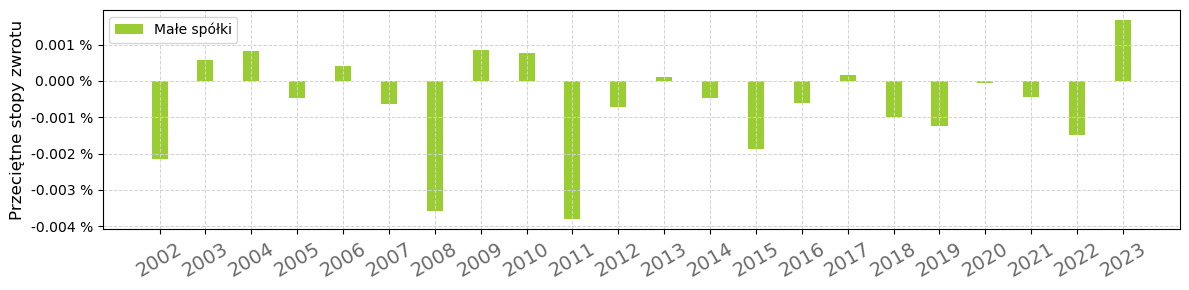

In [17]:
## WERSJA II ##

# Utworzenie pionowego wykresu słupkowego
fig, ax = plt.subplots(figsize = (12,3))

# Ustawienie szerokości słupków i pozycji
bar_width = 0.35
indices = np.arange(len(wykres))

bars1 = ax.bar(indices, wykres['Małe spółki'], bar_width, color='yellowgreen', label='Małe spółki')

ax.set_ylabel('Przeciętne stopy zwrotu', fontsize=12, color='black')
ax.yaxis.set_major_formatter(formatter_per)
ax.set_xticks(indices)
ax.set_xticklabels(wykres['Year'], rotation=30, fontsize=14, color='dimgray')
ax.grid(True, linestyle=GRID_LINESTYLE, linewidth=GRID_LINEWIDTH, color=GRID_COLOR)

ax.legend()
plt.tight_layout()
plt.show()


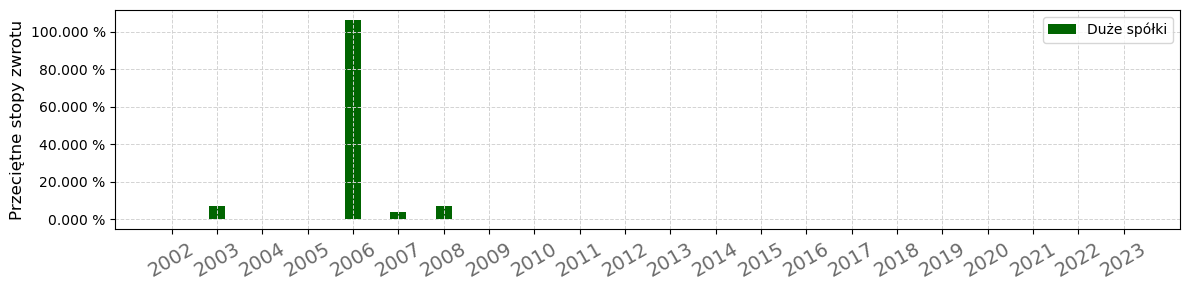

In [18]:
fig, ax = plt.subplots(figsize = (12,3))

# Ustawienie szerokości słupków i pozycji
bar_width = 0.35
indices = np.arange(len(wykres))

bars1 = ax.bar(indices, wykres['Duże spółki'], bar_width, color='darkgreen', label='Duże spółki')
ax.grid(True, linestyle=GRID_LINESTYLE, linewidth=GRID_LINEWIDTH, color=GRID_COLOR)
ax.set_ylabel('Przeciętne stopy zwrotu', fontsize=12, color='black')
ax.yaxis.set_major_formatter(formatter_per)
ax.set_xticks(indices)
ax.set_xticklabels(wykres['Year'], rotation=30, fontsize=14, color='dimgray')

ax.legend()
plt.tight_layout()
plt.show()

In [19]:

file_path1 = "zestawienie nazw.xlsx"
Stopy = pd.read_excel(file_path1, sheet_name="Stopy")



       
Stopy      

,Data,Stopa
0,1998-02-26,24.00
1,1998-04-23,23.00
2,1998-05-21,21.50
3,1998-07-17,19.00
4,1998-09-10,18.00
...,...,...
84,2022-06-09,6.00
85,2022-07-08,6.50
86,2022-09-08,6.75
87,2023-09-07,6.00


In [20]:
w1['Date'] = pd.to_datetime(w1['Date'], format='%d/%m/%Y')
Stopy['Data'] = pd.to_datetime(Stopy['Data'], format='%d/%m/%Y')

In [21]:
w1 = pd.merge_asof(w1, Stopy, left_on='Date', right_on='Data', direction='backward')
        

w1['Mean']*100
    

0      -2.305492
1      -0.796501
2       0.627200
3      -4.157608
4       0.920317
          ...   
5315   -0.335308
5316   -0.559666
5317   -1.885084
5318    2.209696
5319    1.373330
Name: Mean, Length: 5320, dtype: float64

In [22]:
def calculate_sharpe_ratio(df):
    df["Stopa"] = w1["Stopa "].astype(float)
    df['ExcessReturn'] = (df['Mean'] *100) - df['Stopa']
    mean_excess_return = df['ExcessReturn'].mean()
    std_excess_return = df['ExcessReturn'].std()
    sharpe_ratio = mean_excess_return / std_excess_return
    return sharpe_ratio

sharpe_ratios = [calculate_sharpe_ratio(df) for df in rates_list]
sharpe_ratios

[-1.0263344803275618,
 -0.9072988987332519,
 -0.843781144736085,
 0.013917914557637608,
 0.010886686392024425,
 0.014972175161493375,
 -1.2385790821067681,
 -1.1362548386004379,
 -1.1711074704228535,
 0.01506176102093376,
 0.020991241672076163,
 0.01650617226653595,
 -1.2923783107522573,
 -1.2189145747129848,
 -1.282168983206941,
 0.014675487587946663,
 0.017351035911876936,
 0.020171695511852293,
 -1.185257339980633,
 -1.3141505913759584,
 -1.4101871536505703,
 0.014642743960091206,
 0.016049526223496605,
 0.021999394257625354]

# Rozkłady stóp zwrotu z inwestycji 


In [23]:
import seaborn as sns

combined_means = pd.concat([df['Mean'] for df in rates_list], ignore_index=True)

with pd.ExcelWriter('s.xlsx') as writer:
   
    combined_means.to_excel(writer, sheet_name="duzo", index=False)

print(f"Wyniki zostały zapisane w pliku {file_name}")


Wyniki zostały zapisane w pliku Anova_data.xlsx


# Okres refernecyjny a okres sprzedaży


In [24]:
w1 = rates["results_10_1_s"]
w2 = rates["results_20_1_s"]
w3 = rates["results_50_1_s"] 
w4 =rates ["results_10_1_l"]
w5 = rates["results_20_1_l"]
w6 = rates["results_50_1_l"] 
w7 = rates["results_10_3_s"]
w8 = rates["results_20_3_s"]
w9 =rates ["results_50_3_s"] 
w10= rates["results_10_3_l"]
w11 =rates["results_20_3_l"]
w12 = rates["results_50_3_l"]
w13 = rates[ "results_10_5_s"]
w14 = rates[ "results_20_5_s"]
w15 = rates ["results_50_5_s"]
w16 = rates["results_10_5_l"]
w17 = rates["results_20_5_l"]
w18 = rates["results_50_5_l"]
w19 = rates["results_10_10_s"] 
w20 = rates [ "results_20_10_s"]
w21 = rates["results_50_10_s"]
w22 = rates[ "results_10_10_l"]
w23 = rates["results_20_10_l"]
w24 = rates[ "results_50_10_l"]


ref_10 = [w1,w4,w7,w10,w13,w16,w19,w22]
ref_20 = [w2,w5,w8,w11,w14,w17,w20,w23]
ref_50 = [w3,w6,w9,w12,w15,w18,w21,w24]

ref_10 = pd.concat([df['Skumulowana'] for df in ref_10], ignore_index=True)
ref_20 = pd.concat([df['Skumulowana'] for df in ref_20], ignore_index=True)
ref_50 = pd.concat([df['Skumulowana'] for df in ref_50], ignore_index=True)

sp_1 = [w1,w2,w3,w4,w5,w6]
sp_3 = [w7,w8,w9,w10,w11,w12]
sp_5 =[w13,w14,w15,w16,w17,w18]
sp_10 = [w19,w20,w21,w22,w23,w24]

sp_1 = pd.concat([df['Skumulowana'] for df in sp_1], ignore_index=True)
sp_3 = pd.concat([df['Skumulowana'] for df in sp_3], ignore_index=True)
sp_5 = pd.concat([df['Skumulowana'] for df in sp_5], ignore_index=True)
sp_10 = pd.concat([df['Skumulowana'] for df in sp_10], ignore_index=True)


In [25]:
with pd.ExcelWriter('ref_10.xlsx') as writer:
    ref_10.to_excel(writer, sheet_name="duzo", index=False)

with pd.ExcelWriter('ref_20.xlsx') as writer:
    ref_20.to_excel(writer, sheet_name="duzo", index=False)

with pd.ExcelWriter('ref_50.xlsx') as writer:
    ref_50.to_excel(writer, sheet_name="duzo", index=False)


with pd.ExcelWriter('sp_10.xlsx') as writer:
    sp_10.to_excel(writer, sheet_name="duzo", index=False)

with pd.ExcelWriter('sp_1.xlsx') as writer:
    sp_1.to_excel(writer, sheet_name="duzo", index=False)

with pd.ExcelWriter('sp_3.xlsx') as writer:
    sp_3.to_excel(writer, sheet_name="duzo", index=False)

with pd.ExcelWriter('sp_5.xlsx') as writer:
    sp_5.to_excel(writer, sheet_name="duzo", index=False)

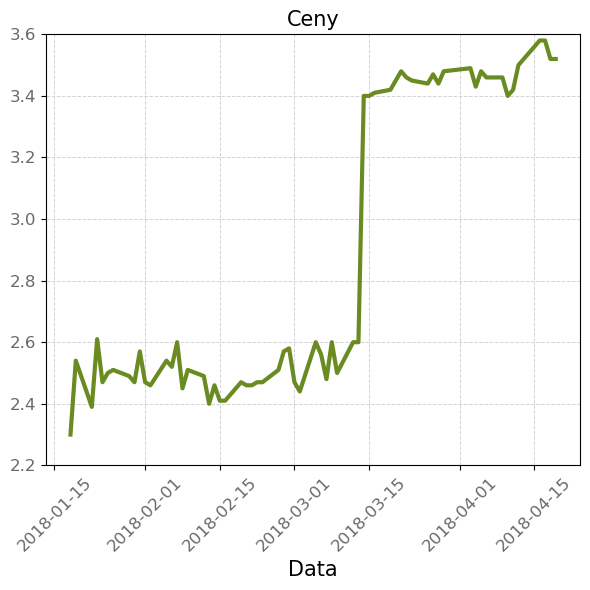

In [49]:
obroty = [230, 254, 239, 261, 247, 250, 251, 249, 247, 
 242, 251, 256, 245, 258, 251, 253, 240, 259, 246, 259, 
 242, 240, 241, 258, 257, 253, 257, 254, 255, 260, 
 253, 256, 240, 252, 252, 260, 246, 260, 241, 
 340, 320, 321, 312, 315, 
 325, 323, 337, 338, 323, 334, 336, 339, 320, 324, 
 323, 340, 324, 333, 329, 331, 321, 329, 339, 320]

ceny = [2.30, 2.54, 2.39, 2.61, 2.47, 2.50, 2.51, 2.49, 2.47, 2.57, 
 2.47, 2.46, 2.54, 2.52, 2.60, 2.45, 2.51, 2.49, 2.40, 2.46, 
 2.41, 2.41, 2.47, 2.46, 2.46, 2.47, 2.47, 2.51, 2.57, 2.58, 
 2.47, 2.44, 2.60, 2.56, 2.48, 2.60, 2.50, 2.60, 2.60, 3.40, 
 3.40, 3.41, 3.42, 3.45, 3.48, 3.46, 3.45, 3.44, 3.47, 3.44, 
 3.48, 3.49, 3.43, 3.48, 3.46, 3.46, 3.40, 3.42, 3.5, 3.52, 
 3.58, 3.58, 3.52, 3.52]



plt.figure(figsize=FIGSIZE)

plt.plot(w1.loc[4000:4063,'Date'],ceny, color= "#698B22", linewidth=3)


# Dodawanie tytułu i etykiet
plt.title("Ceny", fontsize = TITLE_SIZE, color = TITLE_COLOR)
plt.xlabel('Data', fontsize=LABEL_FONT_SIZE, color=LABEL_FONT_COLOR)


# Ustawienia osi i siatki
plt.xticks(rotation=TICKS_FONT_TILT, fontsize=TICKS_FONT_SIZE, color=TICKS_FONT_COLOR)
plt.yticks(fontsize=TICKS_FONT_SIZE, color=TICKS_FONT_COLOR)
plt.grid(True, linestyle=GRID_LINESTYLE, linewidth=GRID_LINEWIDTH, color=GRID_COLOR)
plt.ylim(2.2, 3.6)


plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# Wyświetlanie wykresu
plt.tight_layout()
plt.show()

# Wizualizacja branże 


In [22]:
### BIBLIOTEKI ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_path1 = "results_Szczecin_technology.xlsx"
sheets_dict = pd.read_excel(file_path1, sheet_name=None)

rates_banking = {} # Pusty słownik do zappisywania 
for sheet_name, dataframe in sheets_dict.items():
    rates_banking[sheet_name] = dataframe

q1 = rates_banking['results_10_10_l'] 
q2 = rates_banking['results_20_10_l'] 
q3 = rates_banking['results_50_10_l'] 
q4 = rates_banking['results_10_1_l'] 
q5 = rates_banking['results_20_1_l'] 
q6 = rates_banking['results_50_1_l'] 
q7 = rates_banking['results_10_3_l'] 
q8 = rates_banking['results_20_3_l'] 
q9 = rates_banking['results_20_3_l'] 
q10 = rates_banking['results_10_5_l'] 
q11 = rates_banking['results_20_5_l'] 
q12 = rates_banking['results_50_5_l'] 

rates = [q1, q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12]

def skumulowana(df):
    lista = []
    for i in range(len(df)) :
        lista.append(((1 + pd.Series(df.loc[0:i, 'Mean'])).prod() - 1) * 100)

    df['Skumulowana'] = lista 
   

for df in rates:
    skumulowana(df)


In [23]:
combined_means = pd.concat([df['Skumulowana'] for df in rates], ignore_index=True)

with pd.ExcelWriter('technology.xlsx') as writer:
   
    combined_means.to_excel(writer, sheet_name="duzo", index=False)

print(f"Wyniki zostały zapisane w pliku banking.xlsx ")

Wyniki zostały zapisane w pliku banking.xlsx 
